## Heart_Disease_Diagnostic_Analysis

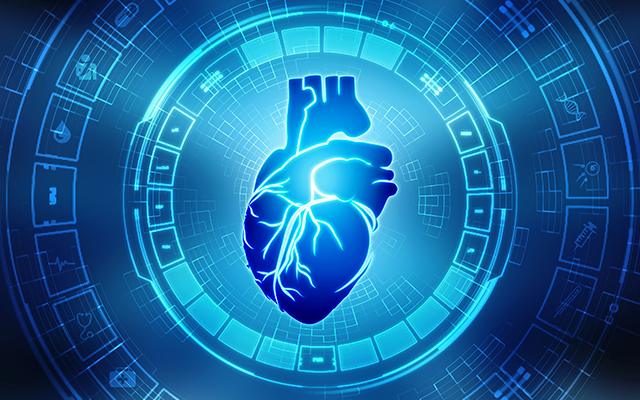

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#### Loading dataset

In [2]:
df = pd.read_csv('heart_disease_dataset.csv')

#### checking Basics Details

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [4]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,-100000,3,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  num       303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,-1319.468647,-655.363036,0.458746
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,11432.566205,8111.366638,0.499120
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,-100000.000000,-100000.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


### Domain Analysis

###### The dataset contains the following information:

- `Age:` The person's age in years

- `Sex:` The person's sex (1 = male, 0 = female)

- `CP:` The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)

- `Trestbps:` The person's resting blood pressure (mm Hg on admission to the hospital)

- `Chol:` The person's cholesterol measurement in mg/dl

- `fbs:` The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)

- `restecg:` Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)

- `thalach:` The person's maximum heart rate achieved

- `exang:` Exercise induced angina (1 = yes; 0 = no)

- `oldpeak:` ST depression induced by exercise relative to rest

- `slope:` the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)

- `ca:` The number of major vessels (0-3)

- `thal:` A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

- `num:` Heart disease (0 = no, 1 = yes)

#### Checking Null Values

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

In [8]:
## Count values of having heart disease

df.num.value_counts()

0    164
1    139
Name: num, dtype: int64

### Converting numerical data into categorical data

In [9]:
def Gender(row):
    if row==0:
        return 'Female'
    elif row==1:
        return 'Male'

In [10]:
df['sex1'] = df.sex.apply(Gender)

In [11]:
def heart_disease(row):
    if row == 0:
        return 'No'
    elif row ==1:
        return 'Yes'

In [12]:
df['heart_disease'] = df.num.apply(heart_disease)
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex1,heart_disease
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Male,No
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Male,Yes


In [13]:
df1 = df['heart_disease'].value_counts()

In [14]:
df1

No     164
Yes    139
Name: heart_disease, dtype: int64

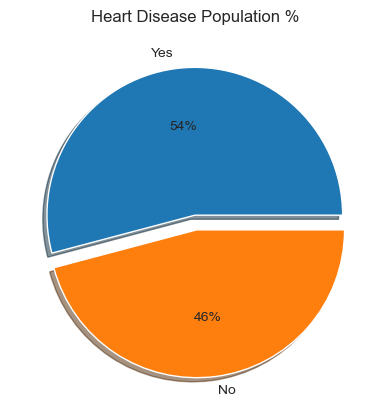

In [15]:
plt.pie(df1, labels = ['Yes', 'No'],explode = (0, 0.1), shadow=True,autopct='%0.0f%%')
plt.title('Heart Disease Population %')
plt.show()

- The above pie data 54% have heart disease, and 46% has no heart disease on overall population

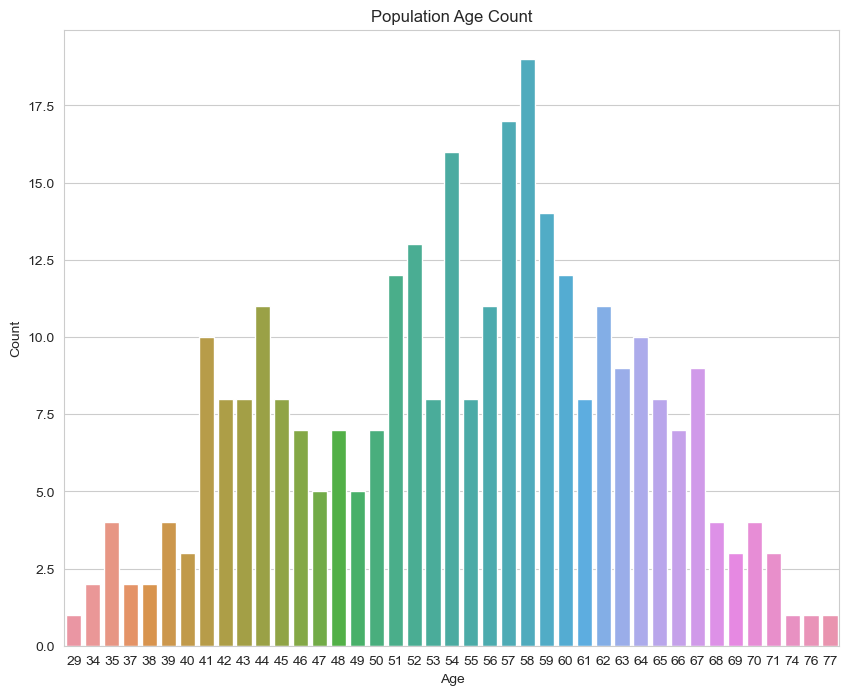

In [16]:
#Countplot Creation of Population Age using MatplotLib and Seaborn
plt.figure(figsize = (10, 8))
sns.countplot(x = df.age)
plt.title('Population Age Count')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

- In the overall population count of age 58

In [17]:
# Statistical Analysis

Min_age = df.age.min()
Max_age = df.age.max()
print('Minimum Age:-', Min_age)
print('Maximum Age:-', Max_age)
print('Mean Age:-', df.age.mean())

Minimum Age:- 29
Maximum Age:- 77
Mean Age:- 54.43894389438944


In [18]:
Young_Ages = df[(df['age']>=29)&(df['age']<40)]
Middle_Ages = df[(df['age']>=40)&(df['age']<55)]
Elderly_Ages = df[(df['age']>55)]

In [19]:
print('Young_Ages  =', len(Young_Ages))
print('Middle_Ages =', len(Middle_Ages))
print('Elderly_Ages=', len(Elderly_Ages))

Young_Ages  = 15
Middle_Ages = 128
Elderly_Ages= 152


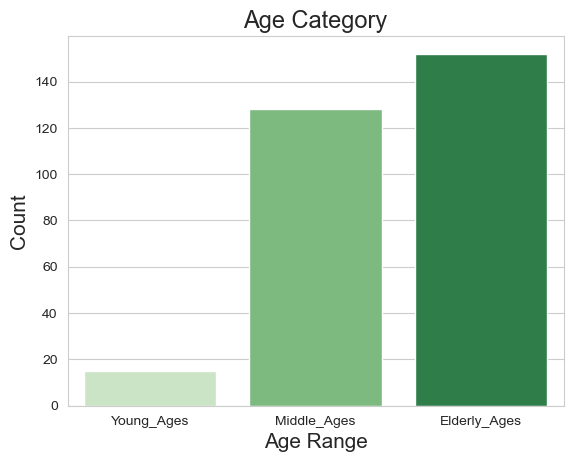

In [20]:
sns.barplot(x=['Young_Ages','Middle_Ages','Elderly_Ages'], y=[len(Young_Ages), len(Middle_Ages), len(Elderly_Ages)], palette='Greens')
plt.title('Age Category', fontsize=17)
plt.xlabel('Age Range', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

In [21]:
#Converting Numerical Data into Categorical Data

def age_range(row):
    if row>=29 and row<40:
        return 'Young_age'
    elif row >=40 and row<55:
        return 'Middle_age'
    elif row>55:
        return 'Elderly_age'

In [22]:
df['Age_range'] = df['age'].apply(age_range)

In [23]:
df.head(3)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,sex1,heart_disease,Age_range
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Male,No,Elderly_age
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1,Male,Yes,Elderly_age
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Male,Yes,Elderly_age


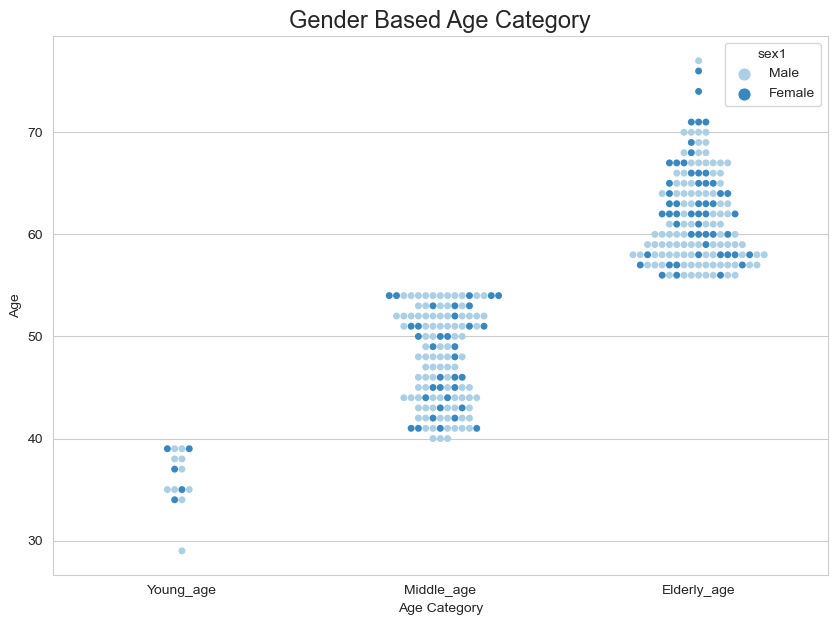

In [24]:
#Swarm Plot Creation of Gender Based Age Category using MatplotLib and Seaborn
plt.figure(figsize=(10, 7))
sns.swarmplot(x = 'Age_range', y = 'age', hue = 'sex1', data=df, order = ['Young_age', 'Middle_age', 'Elderly_age'], palette ='Blues')
plt.title('Gender Based Age Category', fontsize=17)
plt.xlabel('Age Category', fontsize = 10)
plt.ylabel('Age', fontsize=10)
plt.show()

- In Our Population Number Of Males are more in Middle Age Category and Females are more in Elder Age Category

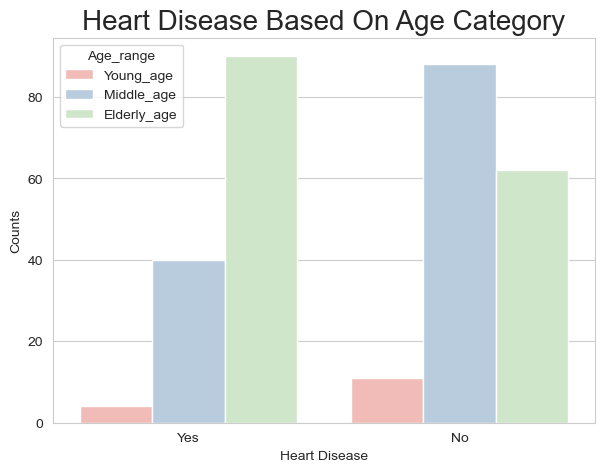

In [25]:
#Count Plot Creation of Heart Disease Based On Age Category using MatplotLib and Seaborn

plt.figure(figsize=(7,5))
h_r = ['Young_age', 'Middle_age', 'Elderly_age']
sns.countplot(x = 'heart_disease', hue = 'Age_range', data=df, order = ['Yes', 'No'], hue_order = h_r, palette='Pastel1')
plt.title('Heart Disease Based On Age Category', fontsize=20)
plt.xlabel('Heart Disease', fontsize=10)
plt.ylabel('Counts', fontsize=10)
plt.show()

- Elder Age People are most affected by Heart Disease AND Middle Age People are mostly FREE from any kind of Heart Disease

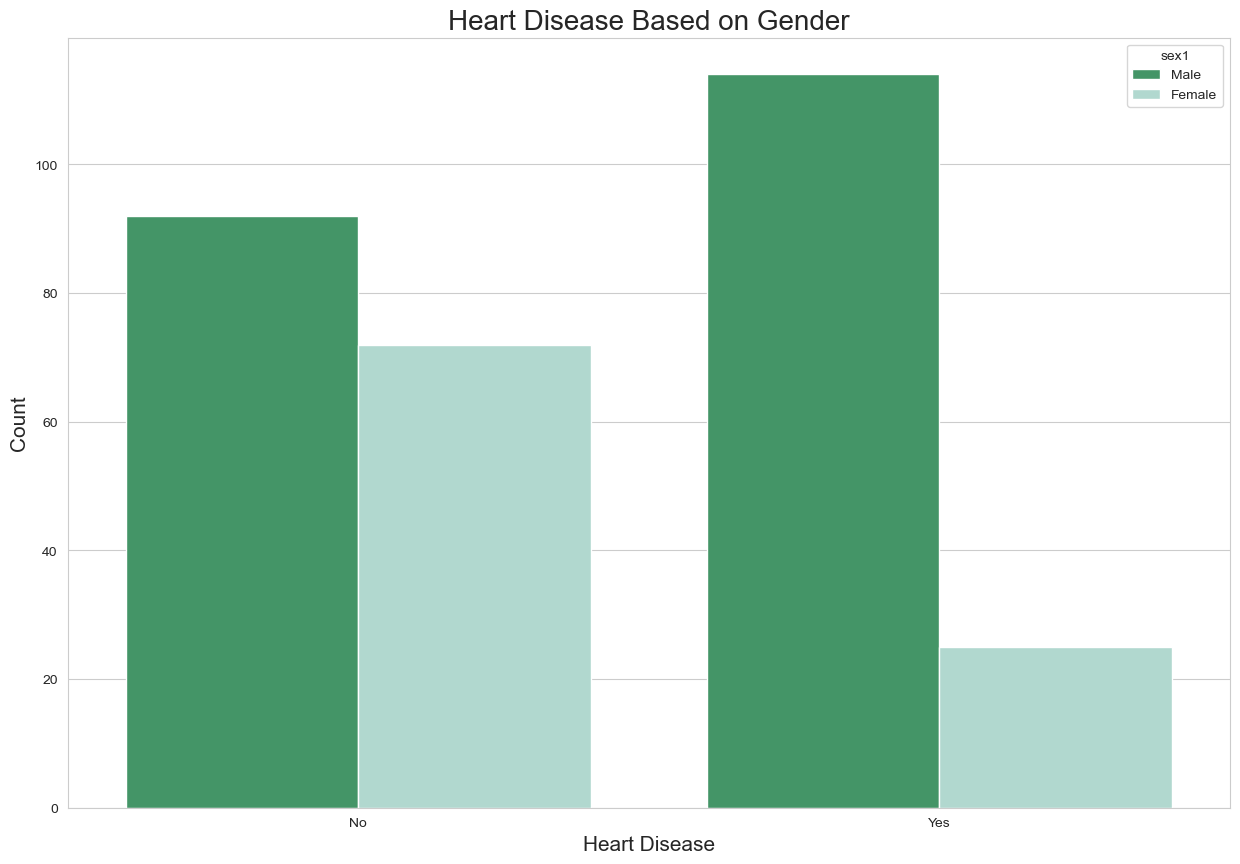

In [26]:
#Count Plot Creation of Heart Disease Based on Gender using MatplotLib and Seaborn

plt.figure(figsize=(15, 10))
sns.countplot(x=df.heart_disease, hue=df.sex1, palette = 'BuGn_r')
plt.title('Heart Disease Based on Gender', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.show()

- The above countplot shows male have more risk of heart disease

In [27]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'sex1',
       'heart_disease', 'Age_range'],
      dtype='object')

In [28]:
df.cp.unique()

array([1, 4, 3, 2], dtype=int64)

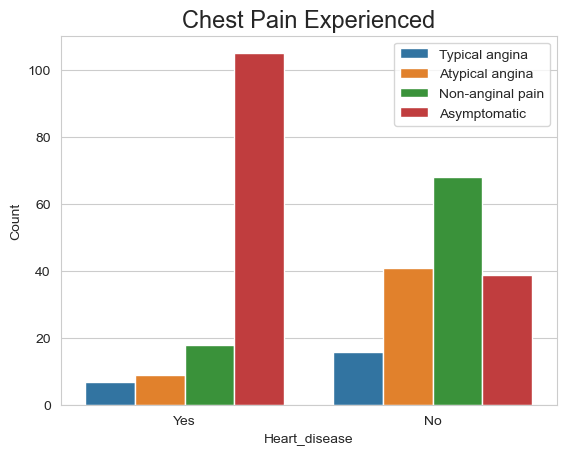

In [29]:
#Count Plot Creation of Chest Pain Experienced using MatplotLib and Seaborn

sns.countplot(x=df.heart_disease, hue = df.cp, order = ['Yes', 'No'])
plt.title('Chest Pain Experienced', fontsize=17)
plt.xlabel('Heart_disease', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.legend(labels = ['Typical angina', 'Atypical angina', 'Non-anginal pain', 'Asymptomatic'])
plt.show()

- It seems people having asymptomatic chest pain have a higher chance of heart disease

In [31]:
df.Age_range.unique()

array(['Elderly_age', 'Young_age', 'Middle_age', None], dtype=object)

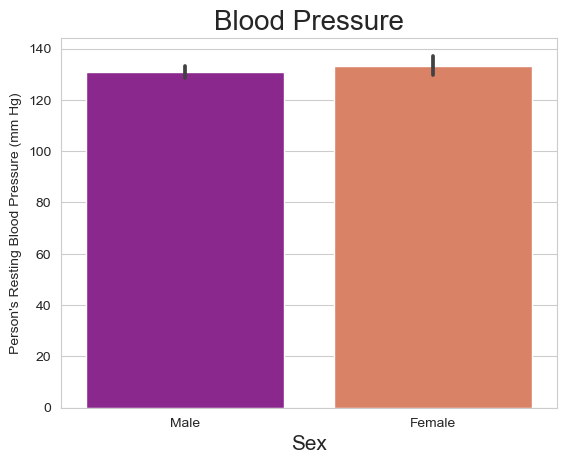

In [32]:
#Bar Plot Creation of Person's Resting Blood Pressure (mm Hg) using MatplotLib and Seaborn

sns.barplot(x= df.sex1, y = df.trestbps, palette = 'plasma')
plt.title("Blood Pressure", fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel("Person's Resting Blood Pressure (mm Hg)", fontsize=10)
plt.show()

- Blood Pressure Rate is almost equal in Males and Females

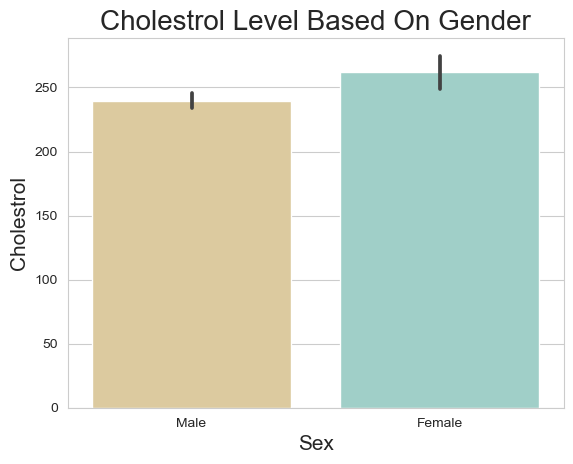

In [33]:
#Bar Plot Creation of Cholestrol Level Based On Gender using MatplotLib and Seaborn
sns.barplot(x=df.sex1, y=df.chol, palette = 'BrBG')
plt.title("Cholestrol Level Based On Gender", fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

-  females have little bit of higher cholesterol than males

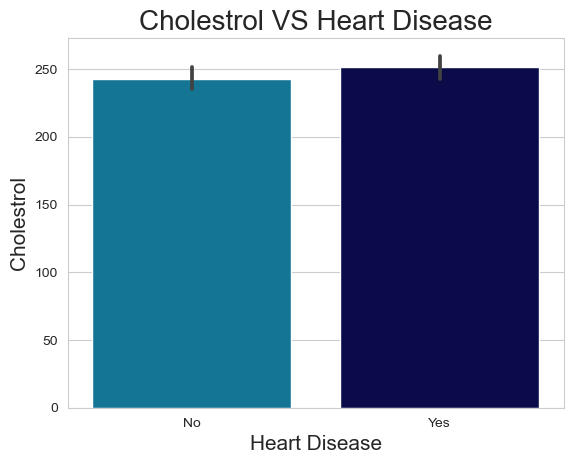

In [34]:
#Bar Plot Creation of Cholestrol VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x=df.heart_disease, y=df.chol, palette = 'ocean_r')
plt.title('Cholestrol VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

- Higher Cholestrol Level results Chances Of Heart Disease

In [35]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num', 'sex1',
       'heart_disease', 'Age_range'],
      dtype='object')

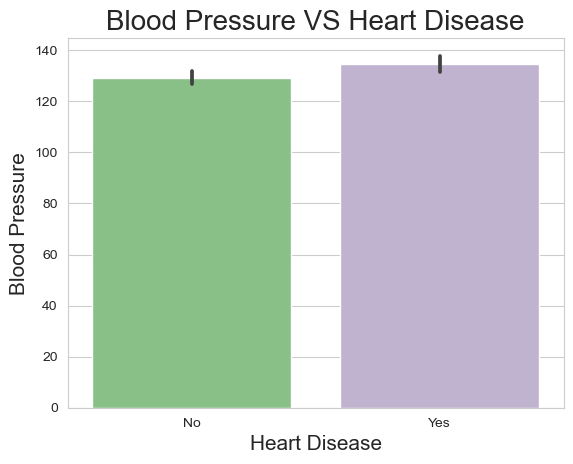

In [36]:
#Bar Plot Creation of Blood Pressure VS Heart Disease using MatplotLib and Seaborn

sns.barplot(x=df.heart_disease, y =df.trestbps, palette = 'Accent')
plt.title('Blood Pressure VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

- Higher Blood Pressure Level results Chances Of Heart Disease

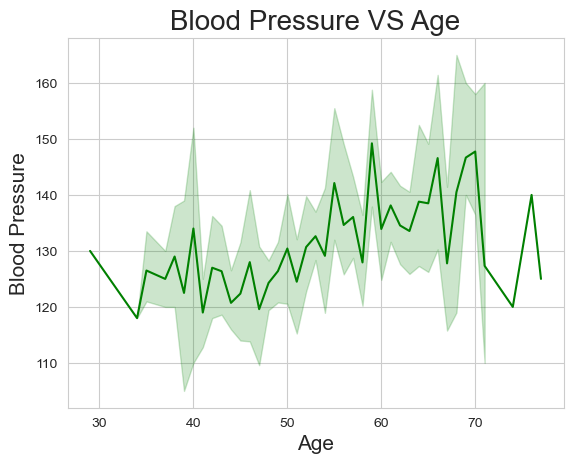

In [37]:
#Line Plot Creation of Blood Pressure VS Age using MatplotLib and Seaborn

sns.lineplot(x=df.age, y=df.trestbps, color='g')
plt.title('Blood Pressure VS Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Blood Pressure', fontsize=15)
plt.show()

- Here we can observe that Blood Pressure increases between age of 50 to 60 and somehow continue the pattern till 70

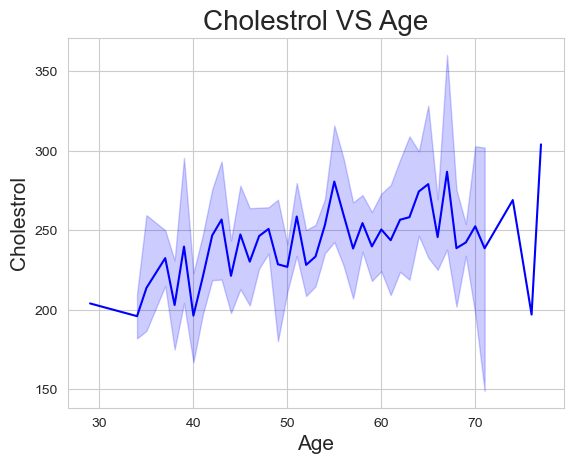

In [38]:
#Line Plot Creation of Cholestrol VS Age using MatplotLib and Seaborn
sns.lineplot(x= df.age, y=df.chol, color='b')
plt.title('Cholestrol VS Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('Cholestrol', fontsize=15)
plt.show()

- Similarly Cholestrol Increasing in the age group of 50-60

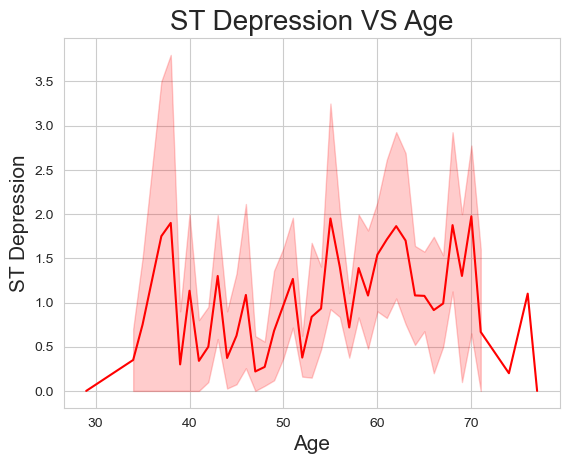

In [39]:
#Line Plot Creation of ST Depression VS Age using MatplotLib and Seaborn

sns.lineplot(x=df.age, y=df.oldpeak, color = 'r')
plt.title('ST Depression VS Age', fontsize=20)
plt.xlabel('Age', fontsize=15)
plt.ylabel('ST Depression', fontsize=15)
plt.show()

- we can observe from here that ST depression mostly increases bw the age group of 30-40
- ST depression refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline.

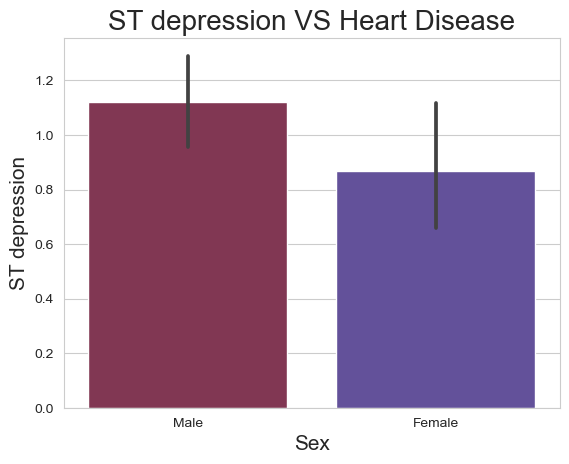

In [40]:
#Bar Plot Creation of ST depression VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x=df.sex1, y=df.oldpeak, palette='twilight_r')
plt.title('ST depression VS Heart Disease', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('ST depression', fontsize=15)
plt.show()

- More Males are prone to ST depression as compare to females

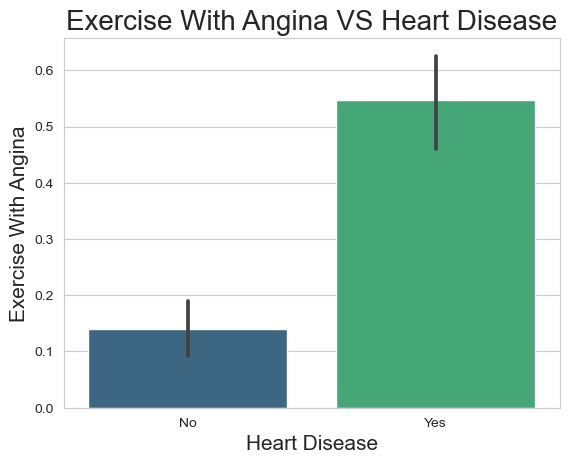

In [41]:
#Bar Plot Creation of Exercise With Angina VS Heart Disease using MatplotLib and Seaborn
sns.barplot(x=df.heart_disease, y=df.exang, palette='viridis')
plt.title('Exercise With Angina VS Heart Disease', fontsize=20)
plt.xlabel('Heart Disease', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

- If you suffer from Angina, you may be concerned that exercise will make your symptoms worse.

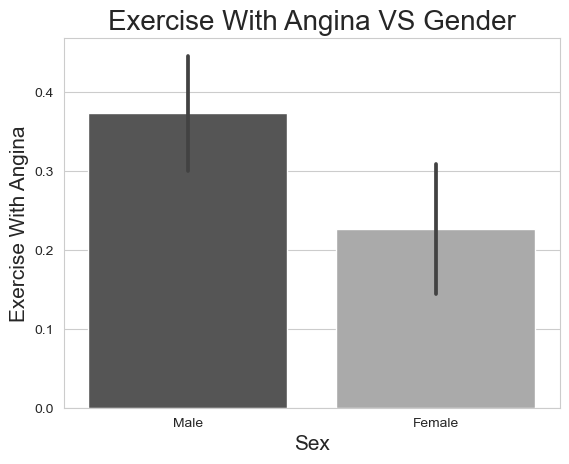

In [42]:
#Bar Plot Creation of Exercise With Angina VS Gender using MatplotLib and Seaborn
sns.barplot(x=df.sex1, y=df.exang, palette='binary_r')
plt.title('Exercise With Angina VS Gender', fontsize=20)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Exercise With Angina', fontsize=15)
plt.show()

- Males have have high Exercise Angina
- A type of chest pain caused by reduced blood flow to the heart.

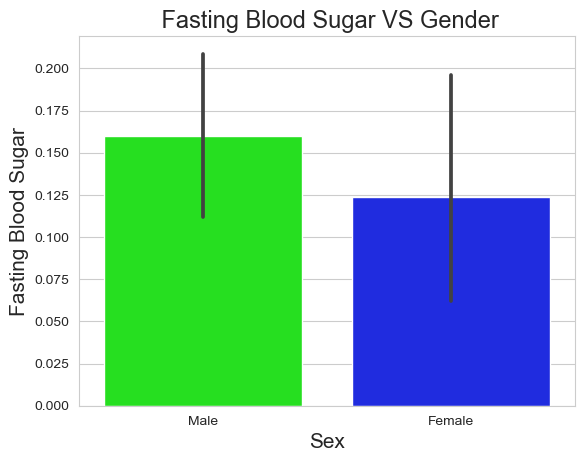

In [43]:
#Bar Plot Creation of Fasting Blood Sugar VS Gender using MatplotLib and Seaborn

sns.barplot(y='fbs', x='sex1', data=df, palette='hsv')
plt.title(' Fasting Blood Sugar VS Gender', fontsize=17)
plt.xlabel('Sex', fontsize=15)
plt.ylabel('Fasting Blood Sugar', fontsize=15)
plt.show()

- Males have high no of Fasting Blood Sugar over 120

<AxesSubplot:>

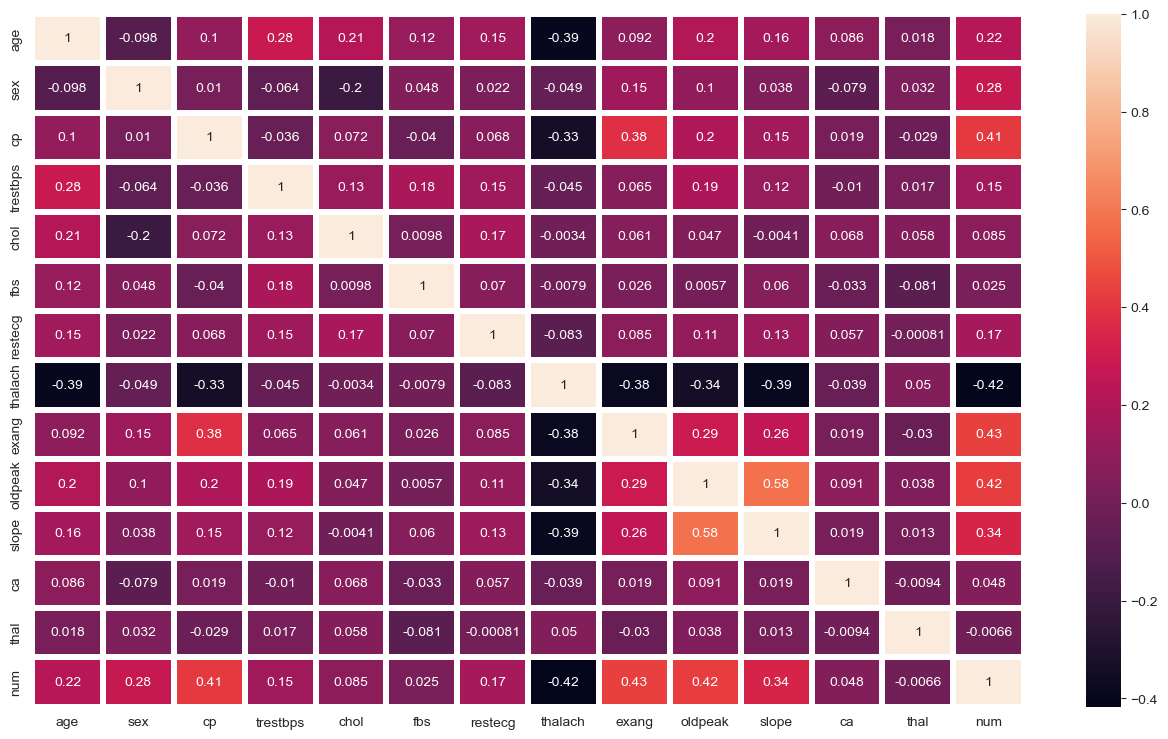

In [44]:
#Heatmap Creation using Seaborn

plt.figure(figsize=(16,9))
sns.heatmap(df.corr(), annot=True, linewidth=3)

In [57]:
df.to_csv('Heart_Disease_Diagnostic.csv')